## Abstract

In this notebook the development of the pharmacy inventory shall be explored. Stocktacking snaphots of the inventory are basis for that. The snapshots are automatically created by the pharmacy managment software in regular intervals. For a comparision, the snapshots of the 1st January of each year were choosen.

Through this exploration, valuable insights in the composition of the pharmacy inventory shall be extracted. Hence, the environment - the reinforcement learning agent is going to act in - can be modelled accurately.

## Preperation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify

In [2]:
inventory_dict = {}
for year in range (2007, 2022, 1):
    data = pd.read_csv (f'data/inventory/{year}.csv', delimiter=';', dtype={
        'PZN': 'str',
        'Bestand': 'int'
    })
    inventory_dict[year] = pd.DataFrame(data)

In [3]:
inventory_start_df = inventory_dict[2007]
inventory_end_df = inventory_dict[2021]
display(inventory_start_df)
display(inventory_end_df)

,PZN,Bezeichnung,HerKue,Darr,Menge,ME,Bestand,Lagerort,NNEK bewertet,NNEK,NNEK Differenz,Zeilenwert bewertet,Zeilenwert unbewertet,Zeilenwert Differenz,Letztes VK Datum,Letztes WE Datum,ArtikelKz,Warengrp. ABDA,Abschlag Typ,ID
0,7233776,28 MINI Tabl.ueberzogen,JENAP,UTA,3X28,ST,2,G,12.37,12.37,0.0,24.74,24.74,0.0,02.12.2006,04.12.2006,!)*,1000,NaN,1||60631||28 MINI Tabl.ueberzogen||UTA||ST||JE...
1,2057599,4-DMAP Ampullen Antidotloesung,KOEHL,AMP,5,ML,1,M,20.90,20.90,0.0,20.90,20.90,0.0,NaN,27.12.2006,!)*,1000,NaN,1||60631||4-DMAP Ampullen Antidotloesung||AMP|...
2,4132744,9 VITAMINE ratiopharm Kapseln,RATIO,KAP,60,ST,1,G,2.90,2.90,0.0,2.90,2.90,0.0,18.12.2006,18.12.2006,!MNV,77777,NaN,1||60631||9 VITAMINE ratiopharm Kapseln||KAP||...
3,225437,AARANE N Dos.-Aerosol,SANOF,DOS,10,ML,1,G,24.66,24.66,0.0,24.66,24.66,0.0,20.12.2006,20.12.2006,!$*,1000,NaN,1||60631||AARANE N Dos.-Aerosol||DOS||ML||SANO...
4,225466,AARANE N Dos.-Aerosol,SANOF,DOS,3X10,ML,1,G,68.23,68.23,0.0,68.23,68.23,0.0,30.12.2006,30.12.2006,!$*,1000,NaN,1||60631||AARANE N Dos.-Aerosol||DOS||ML||SANO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,14901,ZYMAFLUOR D 500 C C Tabl.,NOVAR,TAB,90,ST,1,G,2.55,2.55,0.0,2.55,2.55,0.0,09.12.2006,11.12.2006,!$)=,1000,NaN,1||60631||ZYMAFLUOR D 500 C C Tabl.||TAB||ST||...
4980,3665065,ZYMAFLUOR D 500 Tabl.,NOVAR,TAB,30,ST,1,G,0.96,0.96,0.0,0.96,0.96,0.0,05.08.2006,05.08.2006,!$)=,1000,NaN,1||60631||ZYMAFLUOR D 500 Tabl.||TAB||ST||NOVA...
4981,3665071,ZYMAFLUOR D 500 Tabl.,NOVAR,TAB,90,ST,4,G,2.55,2.55,0.0,10.20,10.20,0.0,27.12.2006,27.12.2006,!$)=,1000,NaN,1||60631||ZYMAFLUOR D 500 Tabl.||TAB||ST||NOVA...
4982,7511382,ZYPREXA 10 mg Filmtabletten,LILLY,FTA,56,ST,1,G,318.62,318.62,0.0,318.62,318.62,0.0,02.11.2006,02.11.2006,!)*,1000,NaN,1||60631||ZYPREXA 10 mg Filmtabletten||FTA||ST...


,PZN,Bezeichnung,HerKue,Darr,Menge,ME,Bestand,Lagerort,NNEK bewertet,NNEK,NNEK Differenz,Zeilenwert bewertet,Zeilenwert unbewertet,Zeilenwert Differenz,Letztes VK Datum,Letztes WE Datum,ArtikelKz,Warengrp. ABDA,Abschlag Typ,ID
0,2.98809E+12,7 KAMMER RAPSKIS WINTEREDI,THIE,,1,ST,1,F,9.45,9.45,0.0,9.45,9.45,0.0,24.10.2014,15.11.2014,DHNRn,5000,NaN,1||65745||7 KAMMER RAPSKIS WINTEREDI|| ||ST|...
1,2295815,ABC Waerme-Creme Capsicum Hansaplast med,BEIER,CRE,50,G,4,G,4.50,4.50,0.0,18.00,18.00,0.0,29.10.2020,07.10.2020,=W,1000,NaN,1||65745||ABC Waerme-Creme Capsicum Hansaplast...
2,2295494,ABC Waerme-Pflaster Capsicum Hansaplast med 14x22,BEIER,PFL,1,ST,28,F,2.70,2.70,0.0,75.60,75.60,0.0,31.12.2020,07.10.2020,!)KNVWn,1000,NaN,1||65745||ABC Waerme-Pflaster Capsicum Hansapl...
3,2295643,ABC Waerme-Pflaster Capsicum Hansaplast med 14x22,BEIER,PFL,2,ST,2,F,5.10,5.10,0.0,10.20,10.20,0.0,12.12.2020,12.12.2020,!)KNVWn,1000,NaN,1||65745||ABC Waerme-Pflaster Capsicum Hansapl...
4,1033409,ABC Waerme-Pflaster sensitive Hansaplast med 1...,BEIER,PFL,4,ST,4,F,5.35,5.35,0.0,21.40,21.40,0.0,30.12.2020,30.12.2020,!KNVWn,1000,NaN,1||65745||ABC Waerme-Pflaster sensitive Hansap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,2799289,ZOVIRAX Lippenherpes Creme,GSKOT,CRE,2,G,24,C,4.22,4.22,0.0,101.28,101.28,0.0,28.12.2020,21.08.2020,!$)=W,1000,NaN,1||65745||ZOVIRAX Lippenherpes Creme||CRE||G||...
3199,2770305,ZWIRNHANDSCHUHE Baumwolle gross,CAREL,HAS,2,ST,1,VG,1.42,1.42,0.0,1.42,1.42,0.0,09.12.2020,09.12.2020,NVn,5000,NaN,1||65745||ZWIRNHANDSCHUHE Baumwolle gross||HAS...
3200,2770535,ZWIRNHANDSCHUHE Baumwolle klein,CAREL,HAS,2,ST,1,N,1.43,1.43,0.0,1.43,1.43,0.0,NaN,15.05.2020,NVn,5000,NaN,1||65745||ZWIRNHANDSCHUHE Baumwolle klein||HAS...
3201,2770529,ZWIRNHANDSCHUHE Baumwolle mittel,CAREL,HAS,2,ST,1,N,1.42,1.42,0.0,1.42,1.42,0.0,21.12.2020,22.12.2020,NVn,5000,NaN,1||65745||ZWIRNHANDSCHUHE Baumwolle mittel||HA...


## Exploration

### Inventory Composition

In [4]:
inventory_start_df = inventory_start_df[['PZN', 'Bestand', 'Lagerort']]
inventory_start_composition_df = inventory_start_df.groupby('Lagerort')['Bestand'].sum()

inventory_end_df = inventory_end_df[['PZN', 'Bestand', 'Lagerort']]
inventory_end_composition_df = inventory_end_df.groupby('Lagerort')['Bestand'].sum()

In [5]:
inventory_composition_df = pd.concat([inventory_start_composition_df, inventory_end_composition_df], axis=1, ignore_index=False)
inventory_composition_df = inventory_composition_df.fillna(0).sort_index().astype('int')
inventory_composition_df.columns = ['Bestand 2007', 'Bestand 2021']
display(inventory_composition_df)

,Bestand 2007,Bestand 2021
Lagerort,,
A,0,3
B,1320,0
BTM,7,3
C,9616,12867
CF,0,79
CG,0,1870
E,2,0
F,11812,6627
FC,7,0


The table shows the development of the inventory composition regarding storage location from 2007 to 2021. Of interest are the categories

- C (Sichtwahl)
- F (Freiwahl)
- G (Generalalphabet)
- BTM (Betäubungsmittel - stored in safe)
- K (Kühlung - stored in fridge)
- R (Rezeptur)
- V (Verband)
- X (Not in stock)

There are several categories that stand for mixed locations (CG, RK, NK, etc). In the following they shall be aggregated using domain knowledge.

In [6]:
locations_dict = {
    "A": "G",
    "B": "G",
    "BTM": "BTM",
    "C": "C",
    "CF": "F",
    "CG": "C",
    "E": "G",
    "F": "F",
    "FC": "F",
    "FG": "F",
    "FO": "F",
    "G": "G",
    "GC": "C",
    "GM": "G",
    "K": "K",
    "M": "G",
    "MK": "K",
    "N": "G",
    "NK": "K",
    "R": "R",
    "RK": "R",
    "T": "G",
    "V": "V",
    "VG": "V",
    "X": "X"
}

In [7]:
inventory_composition_df.index = inventory_composition_df.index.map(lambda x: locations_dict[x])
inventory_composition_df = inventory_composition_df.groupby(inventory_composition_df.index).sum()
inventory_composition_df.loc["Total"] = inventory_composition_df.sum()
inventory_composition_df['change'] = inventory_composition_df.apply(lambda x: round((x['Bestand 2021']-x['Bestand 2007'])/x['Bestand 2007'], 2), axis=1)
display(inventory_composition_df)

,Bestand 2007,Bestand 2021,change
Lagerort,,,
BTM,7,3,-0.57
C,9775,14929,0.53
F,11819,6742,-0.43
G,7071,4221,-0.40
K,75,30,-0.60
R,133,32,-0.76
V,840,355,-0.58
X,213,2300,9.80
Total,29933,28612,-0.04


There are some trends recognizable over the time period. The amount of prescription drugs stored in the pharmacy (BTM, G, K) declined by around 40%. Respectively, the amount of prescription drugs that were not immidiately in stock increased by almost 1000%. Even though some share of that percentage can be explained through an increase in drug diversity as well as delivery bottlenecks in the industry, the mayor share results from a cold-start bias. With the opening of the pharmacy in 2004, the count for storage location X started at zero. Bit by bit customers with prescription for seldom ordered drugs appeared and thereby, the stock of not in stock drugs increased over the year.

Additionally, there is a shift from over-the-counter drugs in F (Freiwahl) to C (Sichtwahl).

<IPython.core.display.Javascript object>


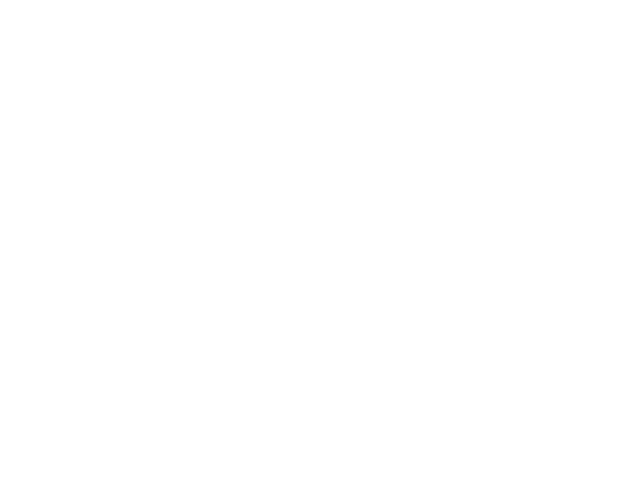

In [8]:
%matplotlib notebook

# Data
inventory_composition_start_df = inventory_composition_df['Bestand 2007'].drop("Total").sort_values(ascending=False)

squarify.plot(sizes=inventory_composition_start_df.values, label=inventory_composition_start_df.index, alpha=.8 )
plt.axis('off')

plt.title("Inventory Composition in 2007")
plt.savefig("visualizations/inventory_composition_2007.svg")
plt.show()

<IPython.core.display.Javascript object>


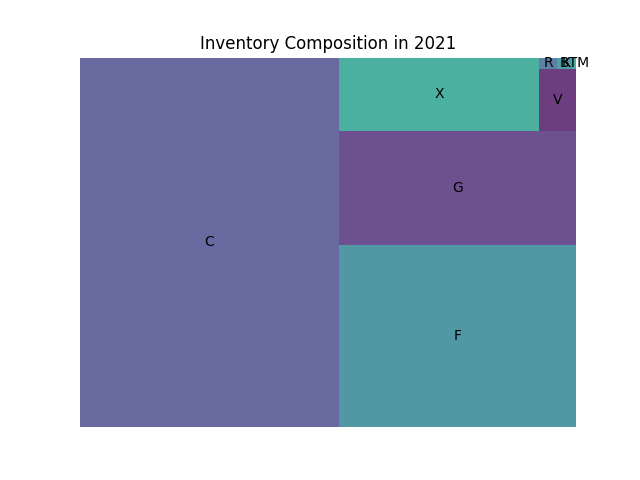

In [9]:
%matplotlib notebook

# Data
inventory_composition_end_df = inventory_composition_df['Bestand 2021'].drop("Total").sort_values(ascending=False)

squarify.plot(sizes=inventory_composition_end_df.values, label=inventory_composition_end_df.index, alpha=.8 )
plt.axis('off')

plt.title("Inventory Composition in 2021")
plt.savefig("visualizations/inventory_composition_2021.svg")
plt.show()

### Drugs in Stock

In [10]:
inventory_df = pd.merge(inventory_start_df, inventory_end_df, on='PZN', how='outer')
inventory_df.columns = ['PZN', 'Bestand 2007', 'Lagerort 2007', 'Bestand 2021', 'Lagerort 2021']
inventory_df[['Bestand 2007', 'Bestand 2021']] = inventory_df[['Bestand 2007', 'Bestand 2021']].fillna(0).astype('int')
inventory_df[['Lagerort 2007', 'Lagerort 2021']] = inventory_df[['Lagerort 2007', 'Lagerort 2021']].fillna('X')
inventory_df['Lagerort 2007'] = inventory_df['Lagerort 2007'].apply(lambda x: locations_dict[x])
inventory_df['Lagerort 2021'] = inventory_df['Lagerort 2021'].apply(lambda x: locations_dict[x])
display(inventory_df)

,PZN,Bestand 2007,Lagerort 2007,Bestand 2021,Lagerort 2021
0,7233776,2,G,0,X
1,2057599,1,G,0,X
2,4132744,1,G,0,X
3,225437,1,G,0,X
4,225466,1,G,0,X
...,...,...,...,...,...
7366,4344392,0,X,1,G
7367,13170548,0,X,14,C
7368,2770305,0,X,1,V
7369,2770535,0,X,1,G


In [11]:
inventory_change_df = inventory_df[['Bestand 2007', 'Bestand 2021']]
inventory_change_df['change'] = inventory_change_df.apply(lambda x: abs(x['Bestand 2021']-x['Bestand 2007']), axis=1)
inventory_change_df.loc["Total"] = inventory_change_df.sum()
display(inventory_change_df)

C:\Users\Niklas\AppData\Local\Temp/ipykernel_17180/949729592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_change_df['change'] = inventory_change_df.apply(lambda x: abs(x['Bestand 2021']-x['Bestand 2007']), axis=1)
C:\Users\Niklas\pharmacy_inventory\env\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Bestand 2007,Bestand 2021,change
0,2,0,2
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
7367,0,14,14
7368,0,1,1
7369,0,1,1
7370,0,1,1


In [12]:
print(f"Percentage of inventory that changed: {inventory_change_df.loc['Total']['change']/(inventory_change_df.loc['Total']['Bestand 2007']+inventory_change_df.loc['Total']['Bestand 2021'])}")

Percentage of inventory that changed: 0.8145016653856009


### General Alphabet Drugs in Stock

In [17]:
prescription_inventory_df = inventory_df[inventory_df['Lagerort 2007'].isin(["G"]) | inventory_df['Lagerort 2021'].isin(["G"])]
display(prescription_inventory_df)

,PZN,Bestand 2007,Lagerort 2007,Bestand 2021,Lagerort 2021
0,7233776,2,G,0,X
1,2057599,1,G,0,X
2,4132744,1,G,0,X
3,225437,1,G,0,X
4,225466,1,G,0,X
...,...,...,...,...,...
7364,2131189,0,X,1,G
7365,1332514,0,X,1,G
7366,4344392,0,X,1,G
7369,2770535,0,X,1,G


In [ ]:
prescription_inventory_change_df = prescription_inventory_df[['Bestand 2007', 'Bestand 2021']]
prescription_inventory_change_df['change'] = prescription_inventory_change_df.apply(lambda x: abs(x['Bestand 2021']-x['Bestand 2007']), axis=1)
prescription_inventory_change_df.loc["Total"] = prescription_inventory_change_df.sum()
display(prescription_inventory_change_df)

In [ ]:
print(f"Percentage of prescription drugs in inventory that changed: {prescription_inventory_change_df.loc['Total']['change']/(prescription_inventory_change_df.loc['Total']['Bestand 2007']+prescription_inventory_change_df.loc['Total']['Bestand 2021'])}")

Over the time period from 2007 to 2021 the inventory composition changed substantially. Only around 20% of the drugs in stock remained the same. This holds for both over-the-counter and prescription drugs. This volatility indicates why it could make sense to let a reinforcement learning agent manage the inventory.